<cite>Darryl Oatridge, August 2022<cite>

In [18]:
import os

In [19]:
os.environ['HADRON_PM_PATH'] = '../hello_hadron/0_hello_meta/demo/contracts'
os.environ['HADRON_DEFAULT_PATH'] = '../hello_hadron/0_hello_meta/demo/data'

## Visualisation

In [20]:
# saves you having to use print as all exposed variables are printed in the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [21]:
from ds_discovery import Wrangle, Transition, Commons
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 12,4

In [23]:
wr = Wrangle.from_env('hello_wr')

In [24]:
df = wr.load_persist_canonical()

In [25]:
wr.canonical_report(df)

,Attributes (13),dType,%_Null,%_Dom,Count,Unique,Observations
0,age,float64,0.0%,3.6%,1309,361,max=80.0 | min=0.1667 | mean=29.52 | dominant=24.0
1,cabin,string,77.5%,77.5%,1309,187,Sample: C23 C25 C27 | G6 | B57 B59 B63 B66 | F4 | F33
2,deck,category,0.0%,77.5%,1309,9,Sample: | C | B | D | E
3,embarked,category,0.0%,69.8%,1309,4,Sample: S | C | Q | nan
4,family,category,0.0%,60.4%,1309,9,Sample: 0 | 1 | 2 | 3 | 5
5,fare,float64,0.0%,4.6%,1309,281,max=512.3292 | min=0.0 | mean=33.28 | dominant=8.05
6,is_alone,category,0.0%,60.4%,1309,2,Sample: 1 | 0
7,parch,category,0.0%,76.5%,1309,8,Sample: 0 | 1 | 2 | 3 | 4
8,pclass,category,0.0%,54.2%,1309,3,Sample: 3 | 1 | 2
9,sex,category,0.0%,64.4%,1309,2,Sample: male | female


<Figure size 864x864 with 0 Axes>

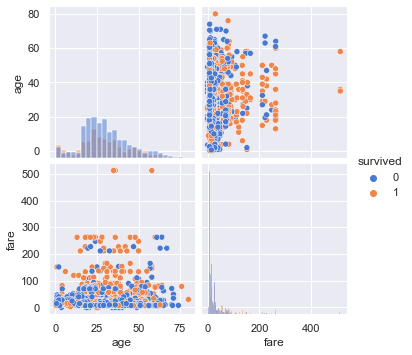

<Figure size 864x288 with 0 Axes>

In [26]:
wr.visual.show_corr_univariate(df, hue='survived', figsize=(12,12))

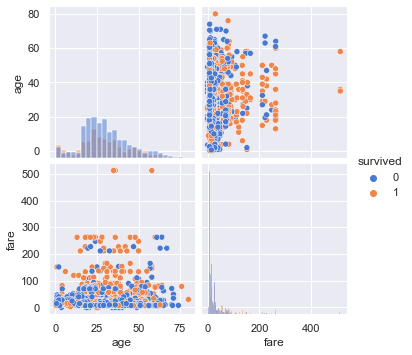

In [27]:
_ = sns.pairplot(df, hue='survived', diag_kind="hist")

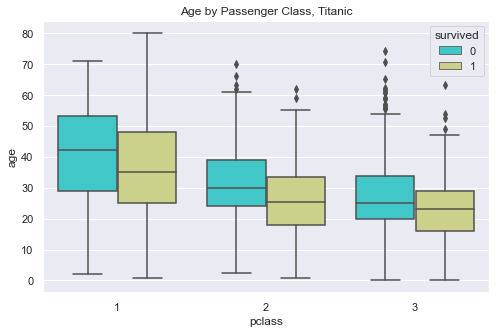

In [28]:
_ = plt.figure(figsize=(8,5))
_ = sns.boxplot(x='pclass',y='age',data=df, hue='survived', palette='rainbow')
_ = plt.title("Age by Passenger Class, Titanic")

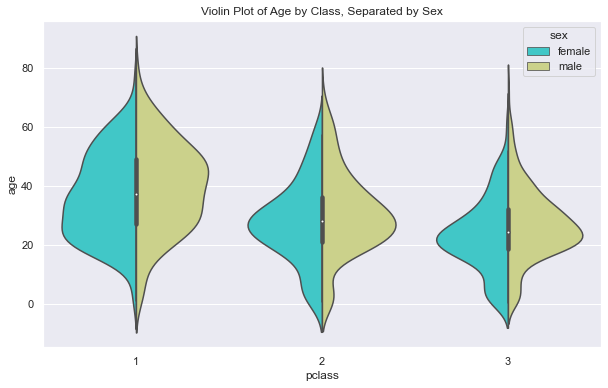

In [29]:
# using the split param so we don't get 6 violins
_ = plt.figure(figsize=(10,6))
_ = sns.violinplot(x='pclass',y="age",data=df, hue='sex', split='True', palette='rainbow')
_ = plt.title("Violin Plot of Age by Class, Separated by Sex")

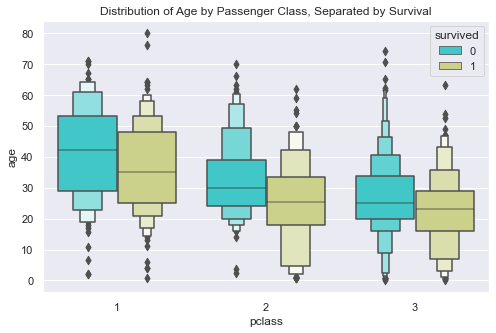

In [30]:
# like boxplot but used for larger data sets (n > 10,000) giving more info on tails
_ = plt.figure(figsize=(8,5))
_ = sns.boxenplot(x='pclass', y='age', data=df, palette='rainbow', hue='survived')
_ = plt.title("Distribution of Age by Passenger Class, Separated by Survival")

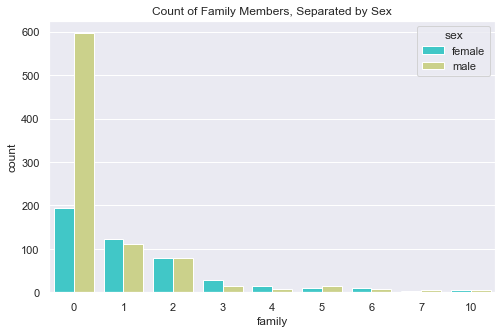

In [31]:
_ = plt.figure(figsize=(8,5))
_ = sns.countplot(x='family',data=df , palette='rainbow',hue='sex')
_ = plt.title("Count of Family Members, Separated by Sex")

/opt/anaconda3/envs/hadron/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


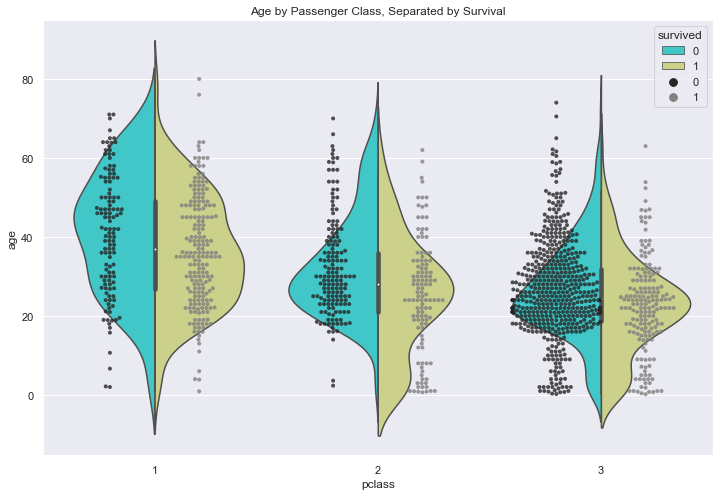

In [32]:
# Combined plots to give more visual information that convey relative volume against individual data points
_ = plt.figure(figsize=(12,8))
_ = sns.violinplot(x='pclass',y="age", data=df, hue='survived', split='True', palette='rainbow')
_ = sns.swarmplot(x='pclass',y="age", data=df, hue='survived', dodge='True', color='grey', alpha=.8, s=4)
_ = plt.title("Age by Passenger Class, Separated by Survival")

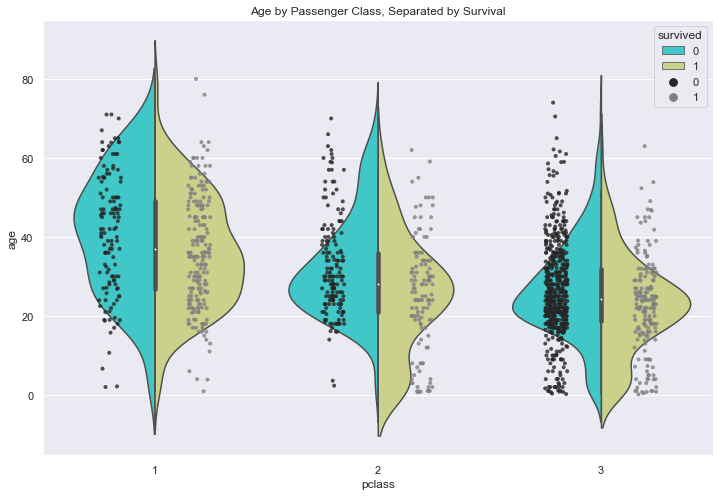

In [33]:
# Combined plots to give more visual information that convey relative volume against individual data points
_ = plt.figure(figsize=(12,8))
_ = sns.violinplot(x='pclass',y="age", data=df, hue='survived', split='True', palette='rainbow')
_ = sns.stripplot(x='pclass',y="age", data=df, hue='survived', dodge='True', color='grey', alpha=.8, s=4)
_ = plt.title("Age by Passenger Class, Separated by Survival")

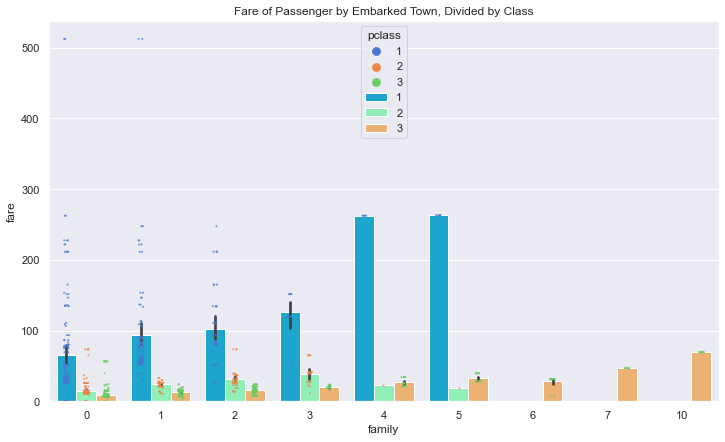

In [34]:
_ = plt.figure(figsize=(12,7))
_ = sns.barplot(x='family',y='fare',data=df, palette='rainbow', hue='pclass')
_ = sns.stripplot(x='family',y="fare",data=df, hue='pclass', dodge='True', alpha=.8, s=2)
_ = plt.title("Fare of Passenger by Embarked Town, Divided by Class")

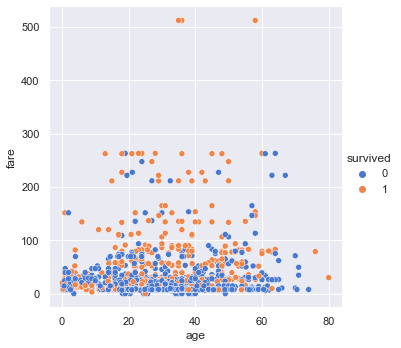

In [35]:
sns.relplot(data=df, x="age", y="fare", hue='survived')

### Visual Stats

In [36]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
# df = sns.load_dataset("mpg")
df.shape
df.head()

(32, 14)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


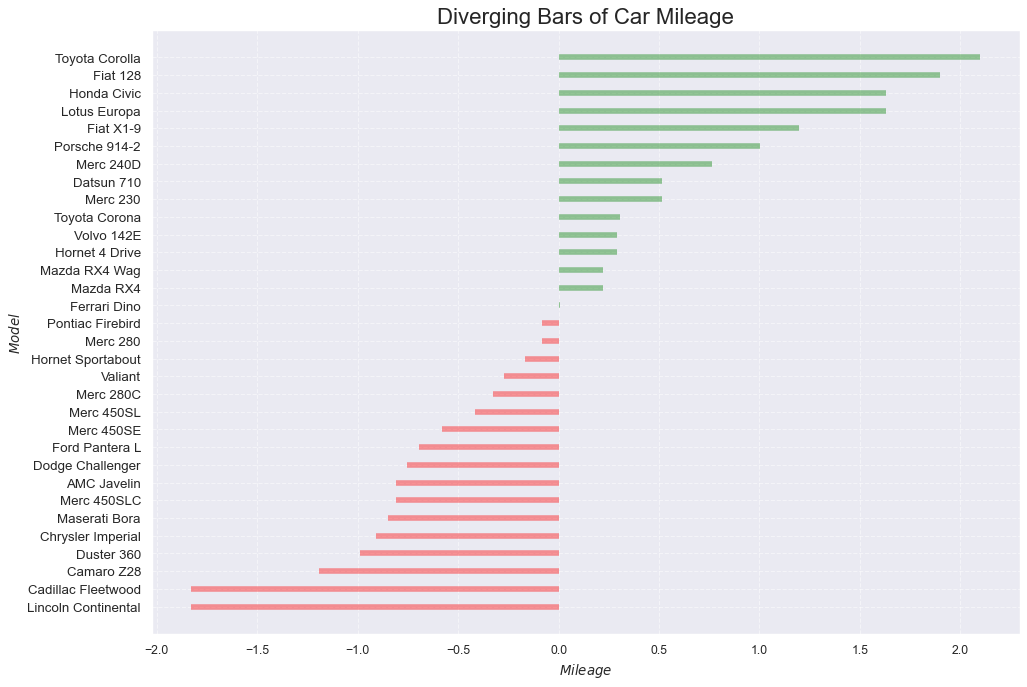

<Figure size 864x288 with 0 Axes>

In [37]:
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
_ = plt.figure(figsize=(14,10), dpi= 80)
_ = plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)

# Decorations
_ = plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')
_ = plt.yticks(df.index, df.cars, fontsize=12)
_ = plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
_ = plt.grid(linestyle='--', alpha=0.5)
plt.show()
plt.clf()

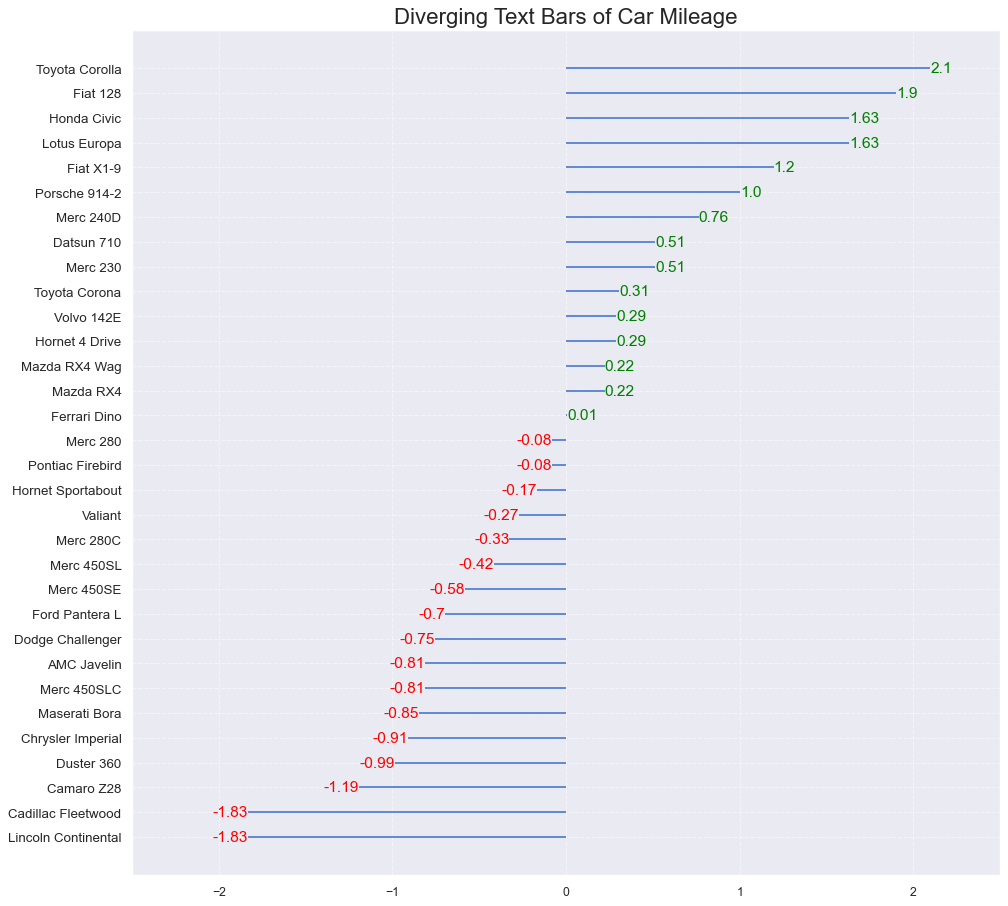

In [38]:
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
_ = plt.figure(figsize=(14,14), dpi= 80)
_ = plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':14})

# Decorations    
_ = plt.yticks(df.index, df.cars, fontsize=12)
_ = plt.title('Diverging Text Bars of Car Mileage', fontdict={'size':20})
_ = plt.grid(linestyle='--', alpha=0.5)
_ = plt.xlim(-2.5, 2.5)
plt.show()

In [39]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv", parse_dates=['date']).head(100)
df.shape
df.head()

(100, 6)

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066


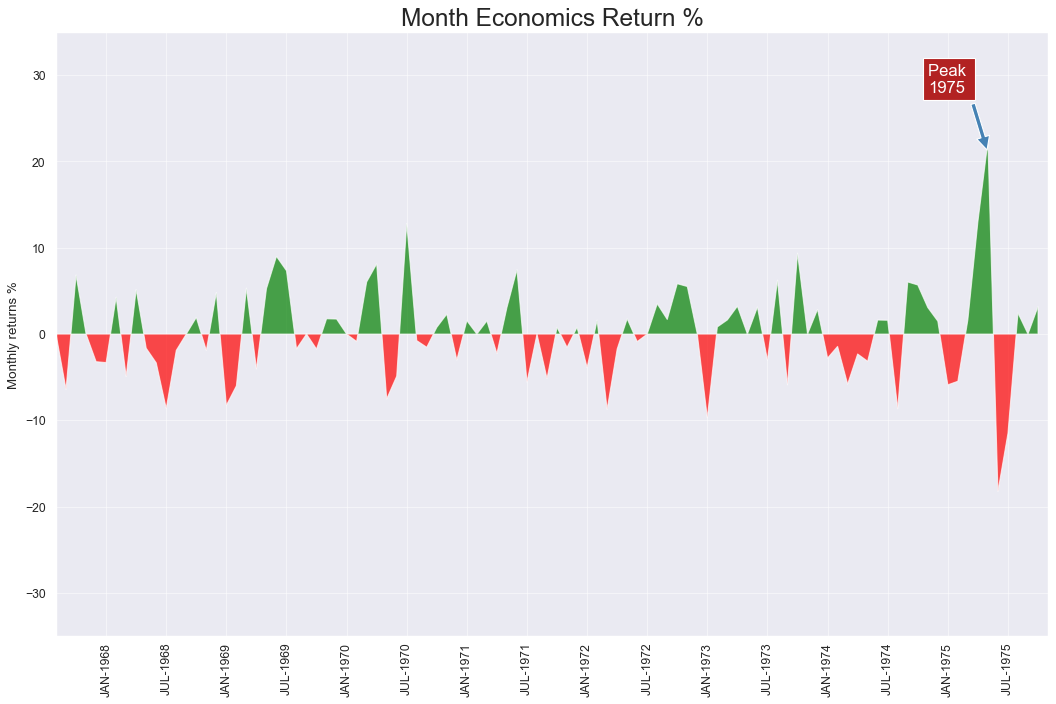

In [40]:
x = np.arange(df.shape[0])
y_returns = (df.psavert.diff().fillna(0)/df.psavert.shift(1)).fillna(0) * 100

# Plot
_ = plt.figure(figsize=(16,10), dpi= 80)
_ = plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
_ = plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)
_ = plt.annotate('Peak \n1975', xy=(94.0, 21.0), xytext=(88.0, 28),
                 bbox=dict(boxstyle='square', fc='firebrick'),
                 arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')


# Decorations
xtickvals = [str(m)[:3].upper()+"-"+str(y) for y,m in zip(df.date.dt.year, df.date.dt.month_name())]
_ = plt.gca().set_xticks(x[::6])
_ = plt.gca().set_xticklabels(xtickvals[::6], rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
_ = plt.ylim(-35,35)
_ = plt.xlim(1,100)
_ = plt.title("Month Economics Return %", fontsize=22)
_ = plt.ylabel('Monthly returns %')
_ = plt.grid(alpha=0.5)
plt.show()

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/USArrests.csv')
df.shape
df.head()

(50, 5)

,Murder,Assault,UrbanPop,Rape,State
0,13.2,236,58,21.2,Alabama
1,10.0,263,48,44.5,Alaska
2,8.1,294,80,31.0,Arizona
3,8.8,190,50,19.5,Arkansas
4,9.0,276,91,40.6,California


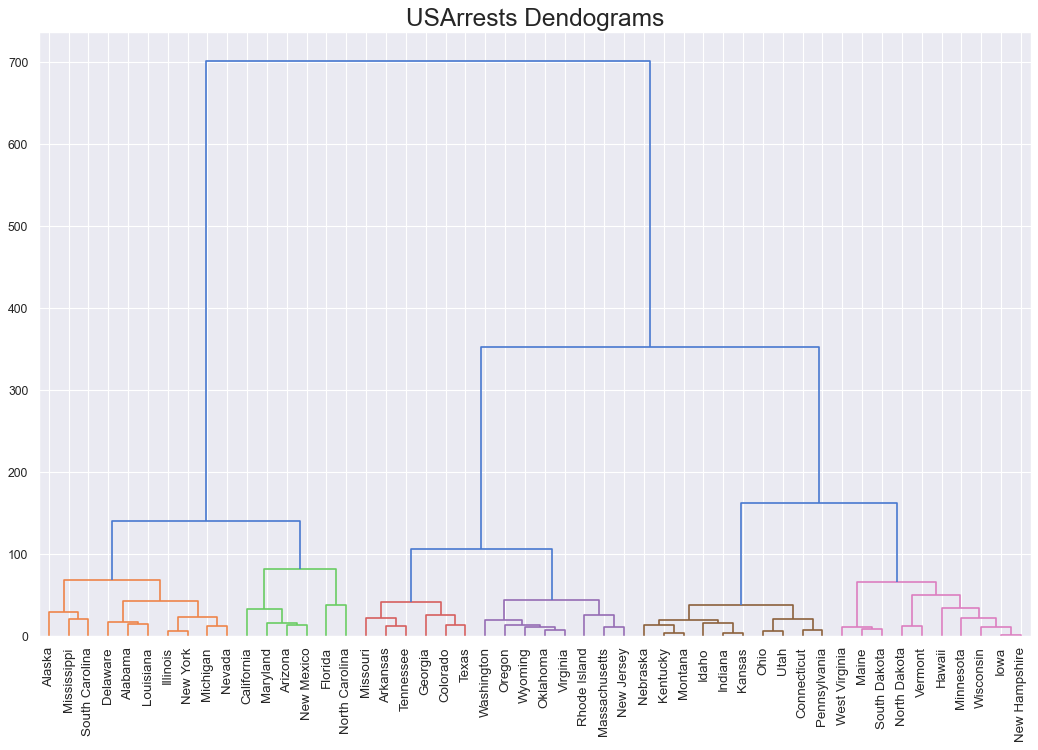

In [42]:
import scipy.cluster.hierarchy as shc
# These functions cut hierarchical clusterings into flat clusterings or find the roots of the forest formed 
# by a cut by providing the flat cluster ids of each observation.
# Plot
_ = plt.figure(figsize=(16, 10), dpi= 80)  
_ = plt.title("USArrests Dendograms", fontsize=22)  
dend = shc.dendrogram(shc.linkage(df[['Murder', 'Assault', 'UrbanPop', 'Rape']], method='ward'), labels=df.State.values, color_threshold=100)  
_ = plt.xticks(fontsize=12)
_ = plt.show()

In [43]:
tips = sns.load_dataset("tips")
tips.shape
tips.head()

(244, 7)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


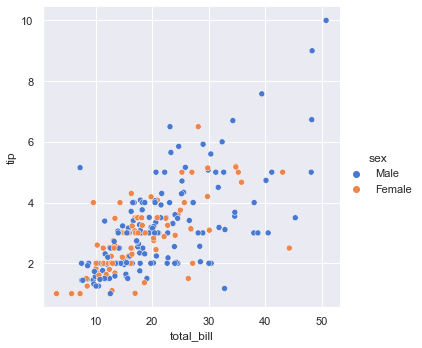

In [44]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="sex")

In [45]:
fmri = sns.load_dataset("fmri")
fmri.shape
fmri.head()

(1064, 5)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


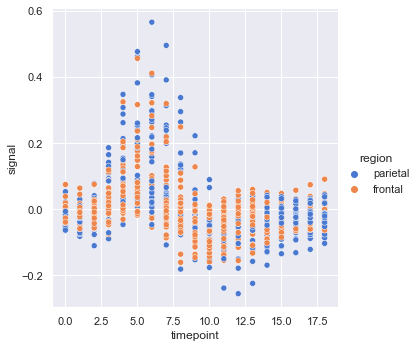

In [46]:
sns.relplot(data=fmri, x="timepoint", y="signal", hue='region')

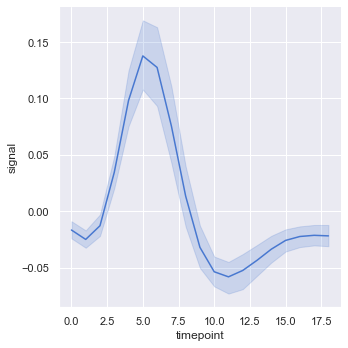

In [47]:
# shade is confident interval
sns.relplot(data=fmri, x="timepoint", y="signal", kind="line")

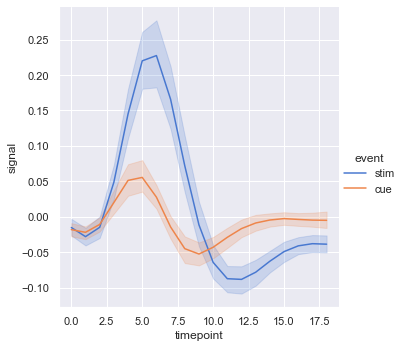

In [48]:
sns.relplot(data=fmri, kind="line", x="timepoint", y="signal", hue='event')

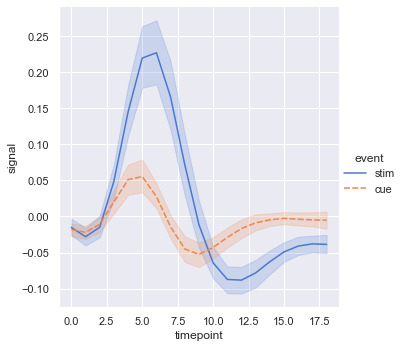

In [49]:
sns.relplot(data=fmri, kind="line", x="timepoint", y="signal", hue='event', style='event')

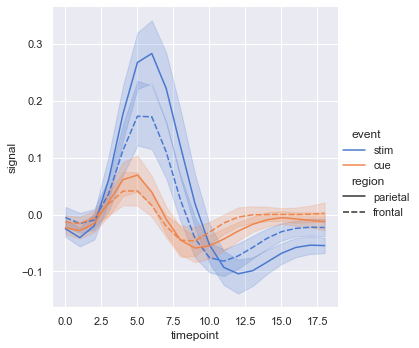

In [50]:
sns.relplot(data=fmri, kind="line", x="timepoint", y="signal", hue='event', style='region')

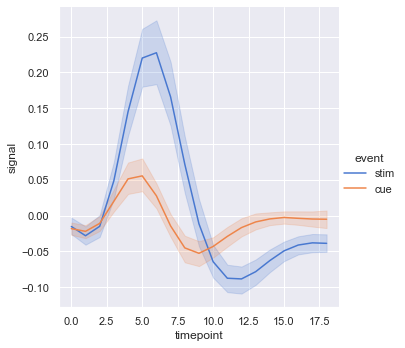

In [51]:
sns.relplot(data=fmri, kind="line", x="timepoint", y="signal", hue='event')

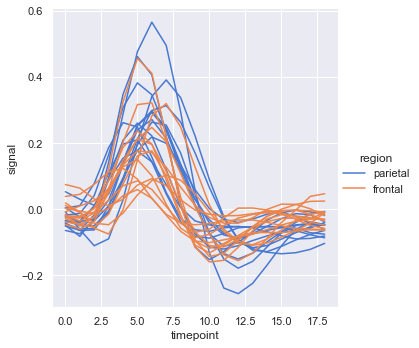

In [52]:
sns.relplot(
    data=fmri.query("event == 'stim'"), kind="line",
    x="timepoint", y="signal", hue="region",
    units="subject", estimator=None,
)

### Others

In [53]:
penguins = sns.load_dataset("penguins")
penguins.shape
penguins.head()

(344, 7)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


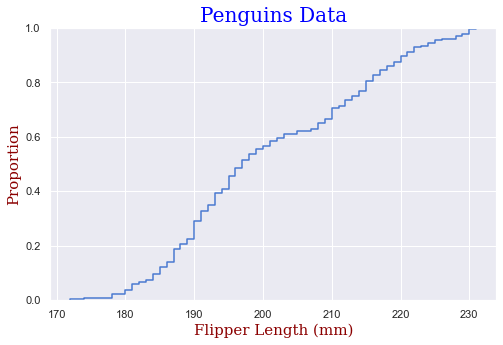

In [54]:
_ = plt.figure(figsize=(8,5))
_ = sns.ecdfplot(data=penguins, x="flipper_length_mm")

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

_ = plt.title("Penguins Data", fontdict = font1)
_ = plt.xlabel("Flipper Length (mm)", fontdict = font2)
_ = plt.ylabel("Proportion", fontdict = font2)


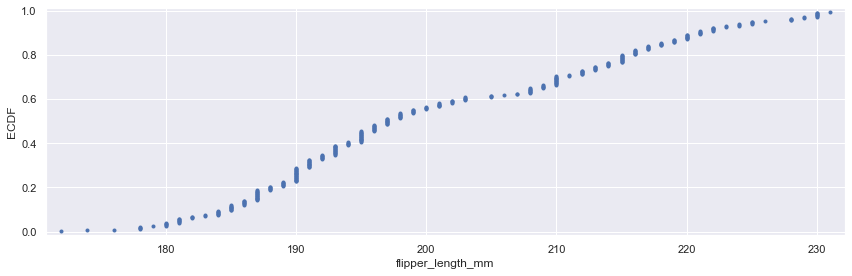

<Figure size 864x288 with 0 Axes>

In [74]:
x = np.sort(penguins['flipper_length_mm'])
sns.set()
y = np.arange(1, len(x) + 1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('flipper_length_mm')
_ = plt.ylabel('ECDF')
plt.margins(0.02)  # Keeps data off plot edges
plt.tight_layout()
plt.show()
plt.clf()


In [56]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [57]:
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g',]

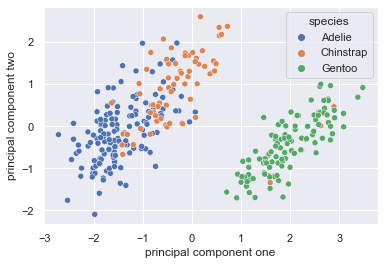

<Figure size 864x288 with 0 Axes>

In [58]:
wr.visual.show_pca(penguins.dropna(), headers=features, hue='species')

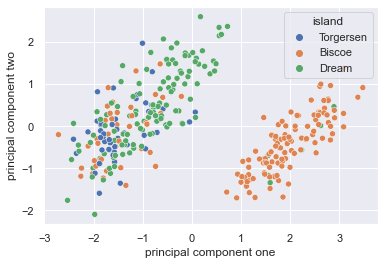

<Figure size 864x288 with 0 Axes>

In [59]:
wr.visual.show_pca(penguins.dropna(), headers=features, hue='island')

In [60]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


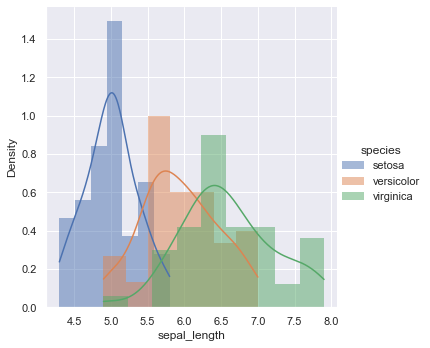

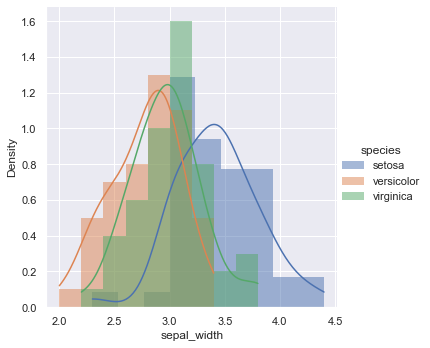

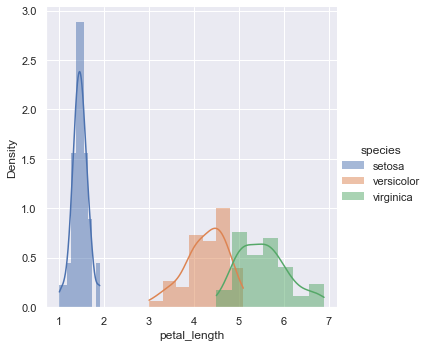

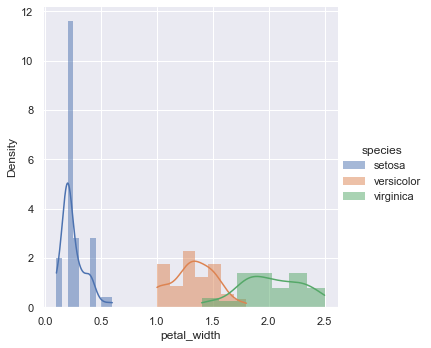

In [61]:
num_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for c in num_cols:
    _ = sns.FacetGrid(iris, hue='species', height=5).map(sns.histplot, c, kde=True, stat="density", linewidth=0).add_legend()


<Figure size 864x864 with 0 Axes>

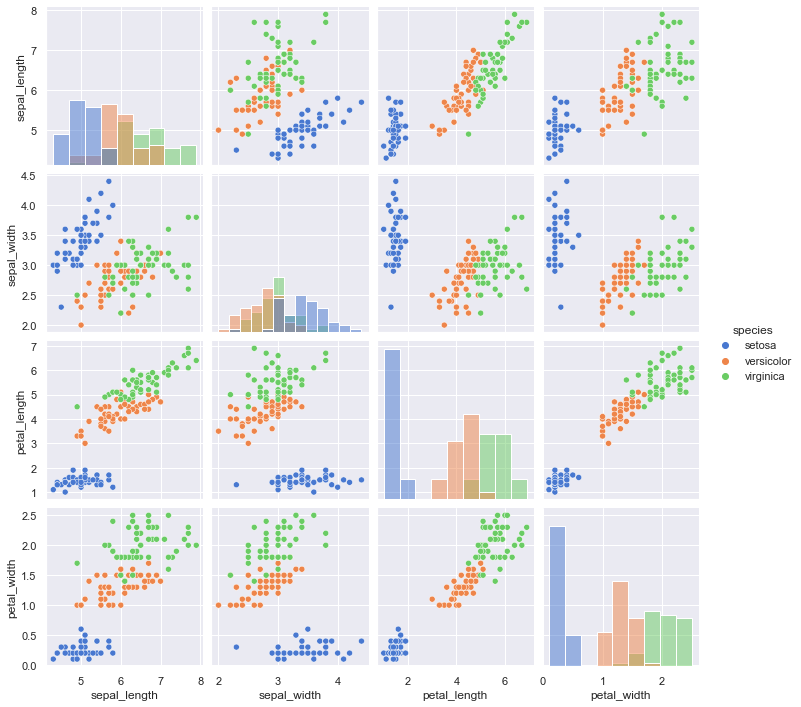

<Figure size 864x288 with 0 Axes>

In [62]:
wr.visual.show_corr_univariate(iris, hue='species')

<Figure size 432x288 with 0 Axes>

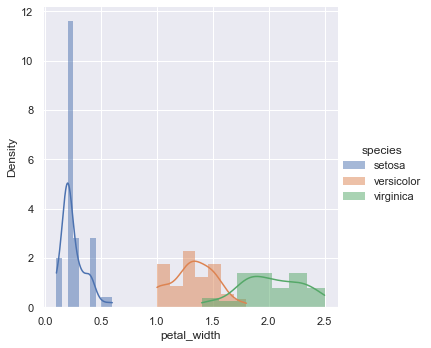

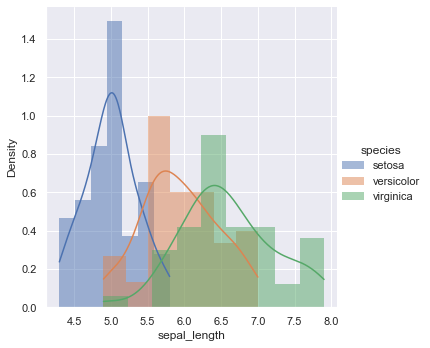

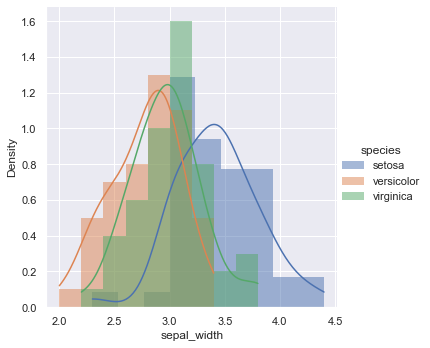

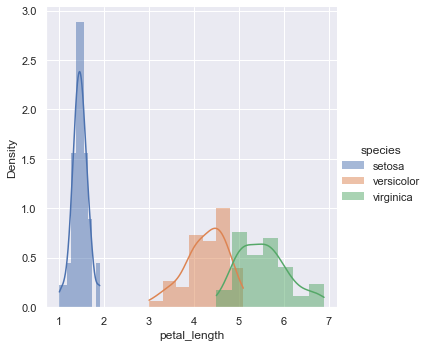

<Figure size 864x288 with 0 Axes>

In [63]:
wr.visual.show_corr_covariate(iris, hue='species')

In [64]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [68]:
df = wr.load_persist_canonical()

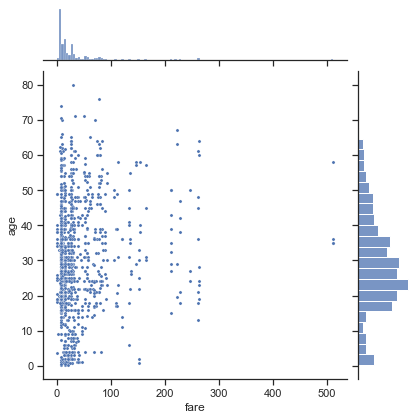

In [69]:
# Age against Fare
sns.set(style="ticks", color_codes=True)
g = sns.jointplot(x='fare',y='age',data=df, s=10)

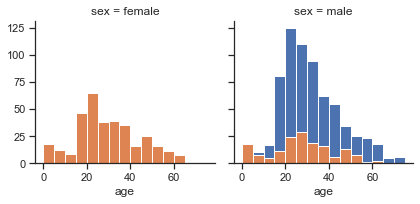

In [70]:
# Age Gender distribution of survived as a hue
sns.set(style="ticks", color_codes=True)
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(data=df, col='sex', hue='survived')
g.map(plt.hist, 'age', bins=bins)
plt.show(g)

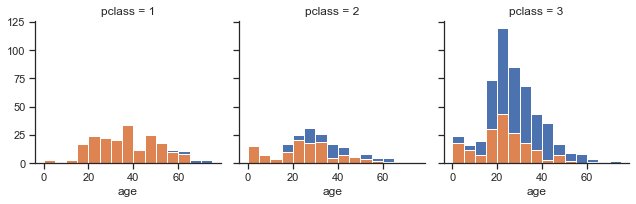

In [71]:
# Age against class with the hue of survived
sns.set(style="ticks", color_codes=True)
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(data=df, col='pclass', hue='survived')
g.map(plt.hist, 'age', bins=bins)
plt.show(g)

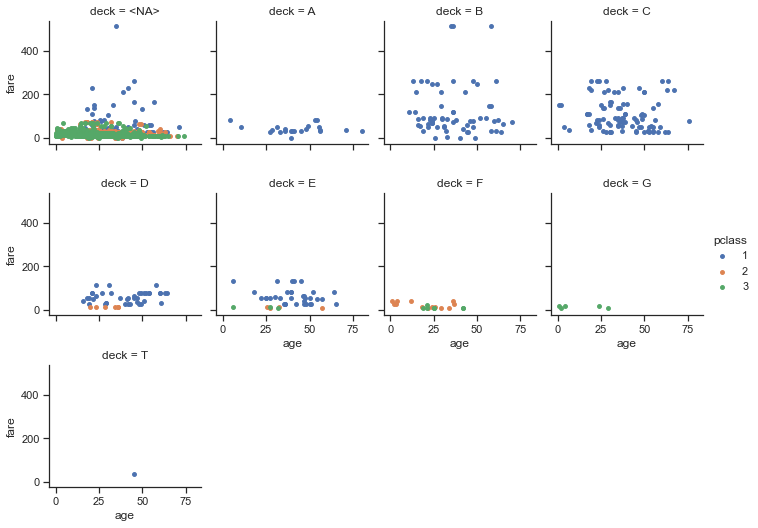

In [72]:
# Age against fair across the decks with a hueof class
sns.set(style="ticks", color_codes=True)
g = sns.FacetGrid(data=df, col='deck', hue='pclass', col_wrap=4, height=2.5)
g = g.map(plt.scatter, 'age', 'fare', s=15).add_legend()
g.fig.subplots_adjust(wspace=0.1, hspace=0.4)
plt.show(g)